<a href="https://colab.research.google.com/github/Preeti0357/projects/blob/main/google_play_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Load the dataset
df = pd.read_csv('googleplaystore.csv')

# Display the first few rows
print(df.head())

# Get basic information
print(df.info())

# Summary statistics
print(df.describe())

# Check dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(f"Columns: {df.columns.tolist()}")

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [17]:
df.drop(10472, axis=0, inplace=True)
print(df.isnull().sum())
# Define Installs_category bins
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 100000000]
labels = ['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'].str.replace(',', '').str.replace('+', '').astype(int), bins=bins, labels=labels)

# Function to fill missing ratings
def fill_missing_ratings(df, category, fill_value):
    filtered_df = df[(df['Installs_category'] == category) & df['Rating'].isnull()]
    df.loc[filtered_df.index, 'Rating'] = fill_value
    return df

# Fill missing ratings with mean values from Installs_category (from document)
df = fill_missing_ratings(df, 'no', 0)
df = fill_missing_ratings(df, 'Very low', 4.637037)
df = fill_missing_ratings(df, 'Low', 4.170970)
df = fill_missing_ratings(df, 'Moderate', 4.035417)
df = fill_missing_ratings(df, 'More than moderate', 4.093255)
df = fill_missing_ratings(df, 'High', 4.207525)

# Drop rows with missing values in other columns
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

# Verify no missing ratings
print(df['Rating'].isnull().sum())  # Should be 0

# Convert Reviews to integer
df['Reviews'] = df['Reviews'].astype(int)

# Clean and convert Installs
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Clean and convert Price
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Convert Size to bytes
def convert_into_bytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size_in_bytes'] = df['Size'].apply(convert_into_bytes)
df['Size_MB'] = df['Size_in_bytes'] / (1024 * 1024)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64
0


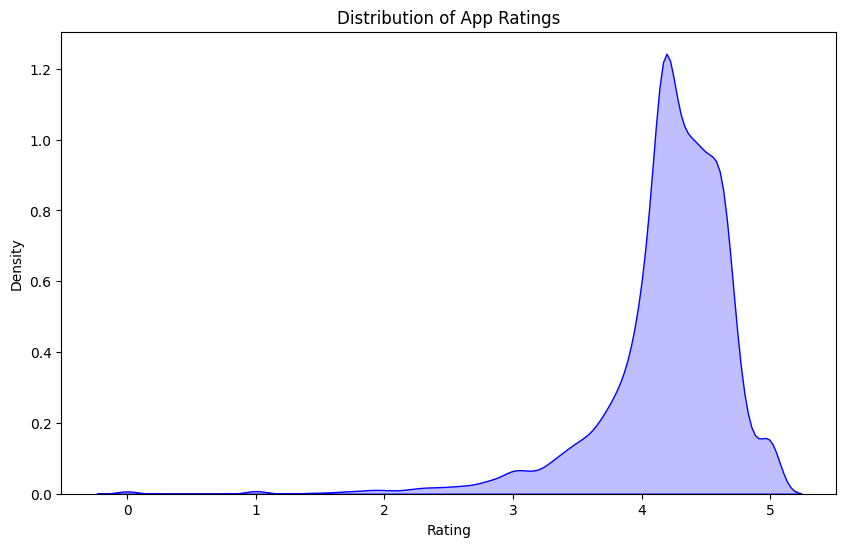

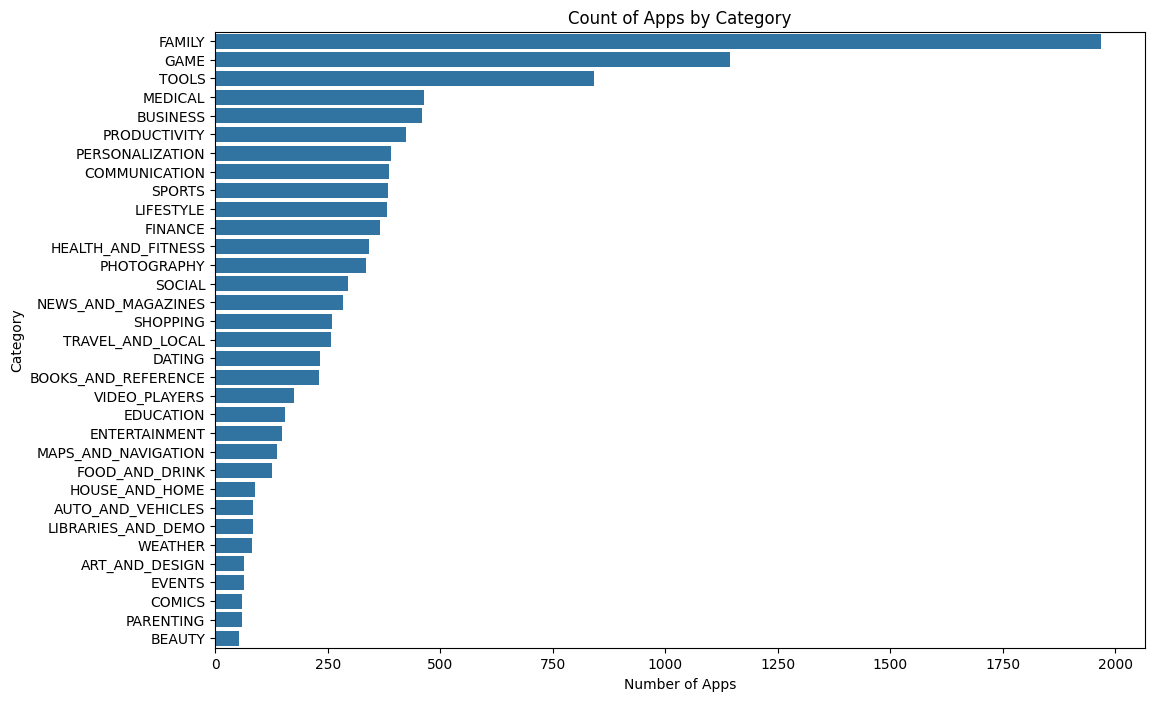

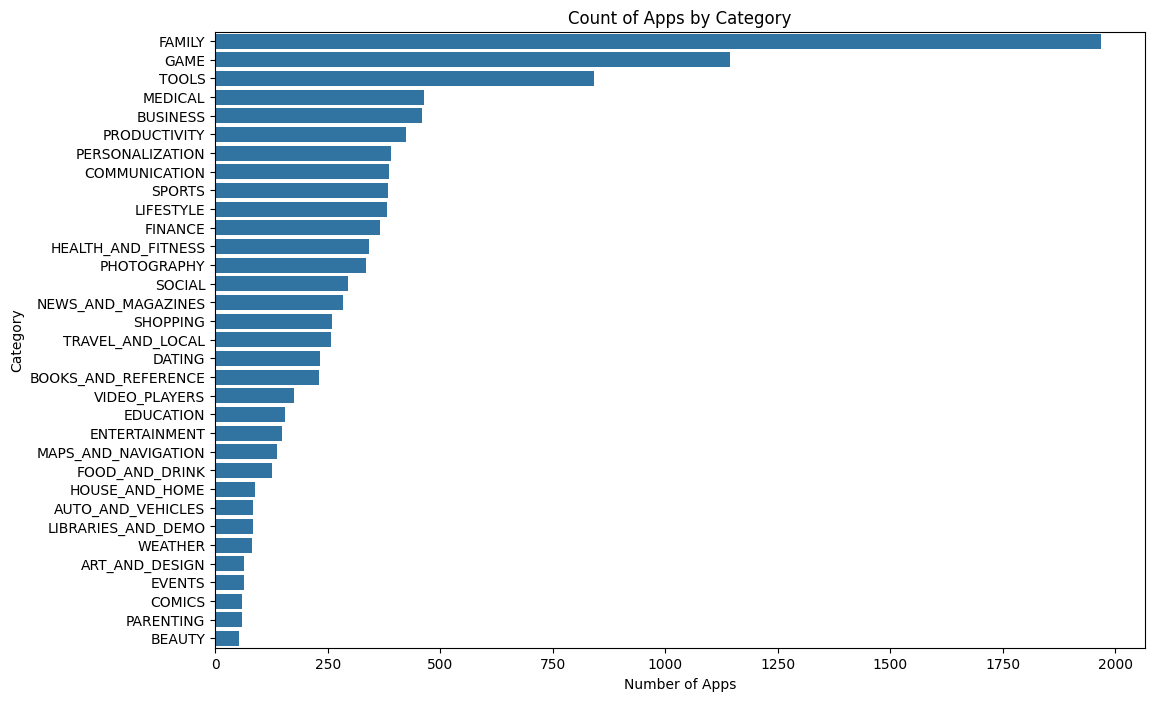

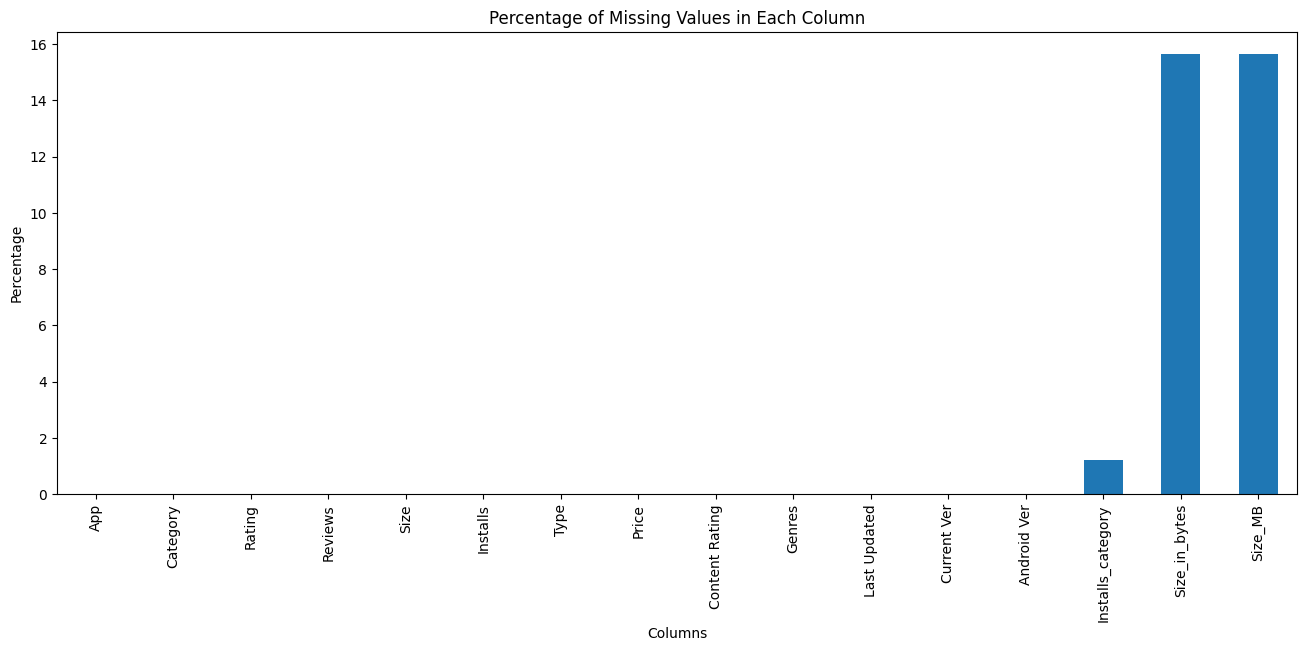

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Rating'], color='blue', fill=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

plt.figure(figsize=(16, 6))
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in Each Column')
plt.show()

Category
EVENTS                 4.394346
EDUCATION              4.387136
BOOKS_AND_REFERENCE    4.357312
PERSONALIZATION        4.323924
ART_AND_DESIGN         4.298885
GAME                   4.286747
HEALTH_AND_FITNESS     4.286247
SHOPPING               4.260600
PARENTING              4.259759
SPORTS                 4.249264
Name: Rating, dtype: float64
                                           App    Installs
2554                                   Google+  1000000000
4096                                     Gmail  1000000000
1917                            Subway Surfers  1000000000
3454                              Google Drive  1000000000
4098                 Maps - Navigate & Explore  1000000000
4104  Messenger – Text and Video Chat for Free  1000000000
3117                 Maps - Navigate & Explore  1000000000
3904                        WhatsApp Messenger  1000000000
3127                        Google Street View  1000000000
3523                              Google Drive  1000

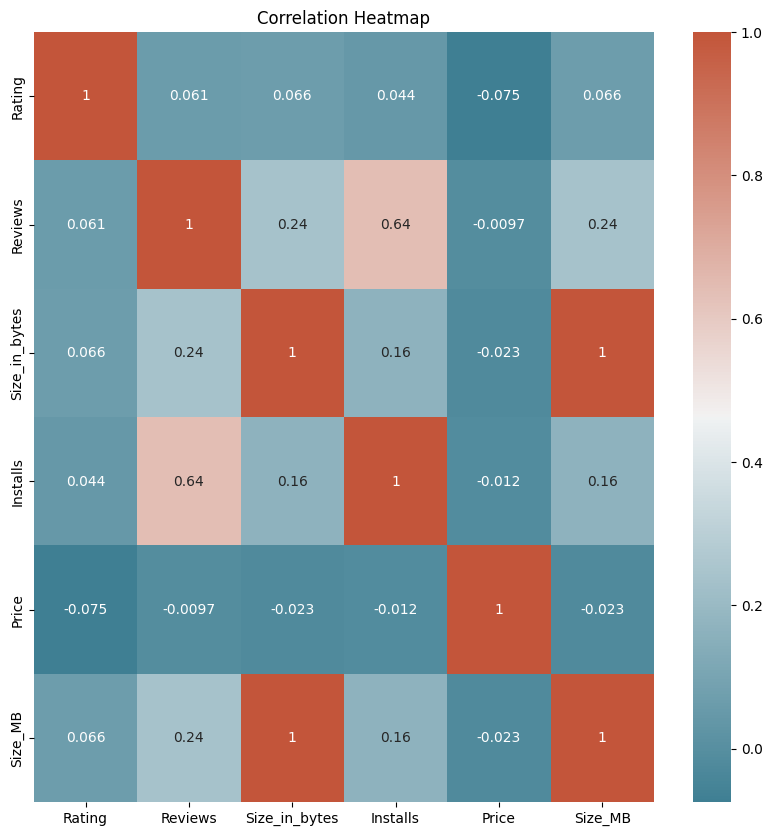

Pearson's R between Reviews and Installs: 0.6211


In [19]:
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
print(avg_rating_by_category)

most_installed_apps = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)
print(most_installed_apps)

top_genres = df['Genres'].value_counts().head(5)
print(top_genres)

category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
print(category_installs)

category_reviews = df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)
print(category_reviews)

numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_MB']
corr = df[numeric_cols].corr()
print(corr)

# Visualize correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Pearson correlation between Reviews and Installs
df_clean = df.dropna()
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")


In [20]:
plt.savefig('rating_distribution.png')

<Figure size 640x480 with 0 Axes>